# Jupyter Notebooks: A Primer

Jupyter Notebooks offer a great way to write and iterate on your Python code. It is an incredibly powerful tool for interactively developing and presenting data science projects. A notebook integrates code and its output into a single document that combines visualisations, narrative text, mathematical equations, and other rich media. The intuitive workflow promotes iterative and rapid development, making notebooks an increasingly popular choice at the heart of contemporary data science, analysis, and increasingly science at large. Best of all, as part of the open source _Project Jupyter_, they are completely free.

[Project Jupyter](https://jupyter.org/) is the successor to an earlier IPython Notebook, which was first published as a prototype in 2010. Jupyter Notebook is built off of IPython, an interactive way of running Python code in the terminal using the **REPL model (Read-Eval-Print-Loop)**. The _IPython Kernel_ runs the computations and communicates with the Jupyter Notebook front-end interface. It also allows Jupyter Notebook to support multiple languages. Jupyter Notebooks extend IPython through additional features, like storing your code and output and allowing you to keep markdown notes.

Although it is possible to use many different programming languages within Jupyter Notebooks, this article will focus on Python as it is the most common use case.

## Getting Started with Jupyter Notebooks!

### Installation

#### Prerequisites
As you would have surmised from the above abstract we need to have Python installed on your machin. Either Python 2.7 or Python 3.+ will do.

#### Install using Anaconda
The easiest way for a beginner to get started with Jupyter Notebooks is by installing it using Anaconda. Anaconda installs both Python3 and Jupyter and also includes quite a lot of packages commonly used in the data science and machine learning community. You can follow the latest guidelines from [here](https://jupyter.readthedocs.io/en/latest/install.html) 

#### Install using Pip
If, for some reason, you decide not to use Anaconda, then you can install Jupyter manually using Python pip package, just follow the below code:

<pre style="background-color:#333;padding:10px;color:white;">
pip install jupyter
</pre>

### Launching First Notebook
To launch a Jupyter notebook, open your terminal and navigate to the directory where you would like to save your notebook. Then type the below command and the program will instantiate a local server at <span style="color:#EE0000;">http://localhost:8888/tree<span>
<pre style="background-color:#333;padding:10px;color:white;">
jupyter notebook
</pre>

A browser window should immediately pop up with the Jupyter Notebook interface. As you might have already noticed Jupyter’s Notebooks and dashboard are web apps, and Jupyter starts up a local Python server to serve these apps to your web browser. It makes Jupyter Notebooks platform independent and thus making it easier to share with others.

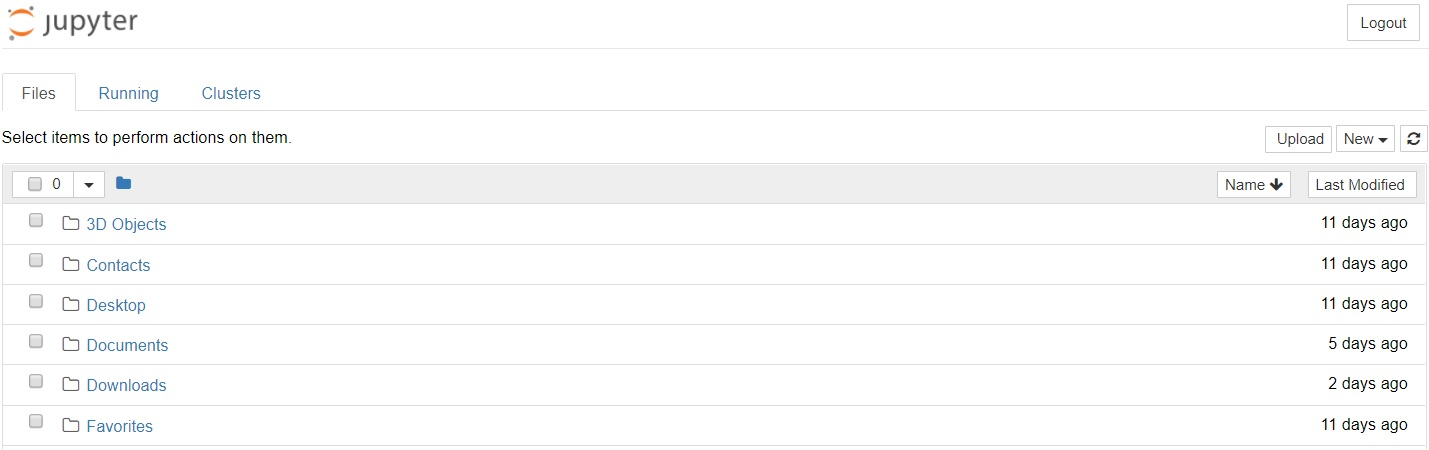

The **Files** tab is where all your files are kept, the **Running** tab keeps track of all your processes and the third tab, **Clusters**, is provided by IPython parallel, IPython's parallel computing framework. It allows you to control many individual engines, which are an extended version of the IPython kernel.

Let's start by making a new notebook. We can easily do this by clicking on the **New** drop-down list in the top-right corner of the dashboard. You see that you have the option to make a Python 3 notebook as well as regular text file, a folder, and a terminal. Please select the Python 3 notebook option.

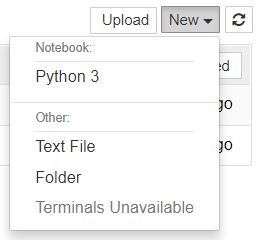

### TODO -- Add Snapshots for creating and executing cells.

## Analyzing the Revenue and Profit Trends of Fortune 500 companies from 1955-2013

As we go through this example, we will learn how the jupyter notebooks are used in practice and also understand some of the advanced features.

### Downloading the DataSet

The data set that we will be using to analyze the revenue and profit trends of fortune 500 companies has been sourced from [Fortune 500 Archives](http://archive.fortune.com/magazines/fortune/fortune500_archive/full/2005/) and [topforeignstocks.com](https://topforeignstocks.com/downloads/). 
For your ease we have compiled the data from both the sources and created a [CSV](https://github.com/ORION6194/jupyterNotebooks/blob/master/data/fortune500_1955_2013.csv) for you.

### Importing the required dependencies

Let's start off with a code cell specifically for imports and initial setup, so that if we need to add or change anything at a later point in time, we can simply edit and re-run the cell without having to change the other cells. We can start by importing [pandas](https://pandas.pydata.org/) to work with our data, [Matplotlib](https://matplotlib.org/) to plot the charts and [Seaborn](https://seaborn.pydata.org/) to make our charts prettier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

### Set the design styles for the charts 

In [2]:
sns.set(style="darkgrid")

### Load the input data to be analyzed

As we plan on using pandas to aid in our analysis, lets begin by importing our input data set into the most widely used pandas data-structure, **DataFrame**.   

In [3]:
df = pd.read_csv('../data/fortune500_1955_2013.csv')

Now that we are done loading our input dataset, let us see how it looks like! 

In [4]:
df.head()

Year  Rank           Company Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                9823.5                  806
1  1955     2       Exxon Mobil                5661.4                584.8
2  1955     3        U.S. Steel                3250.4                195.4
3  1955     4  General Electric                2959.1                212.6
4  1955     5            Esmark                2510.8                 19.1

Looking good. We have the columns we need, and each row corresponds to a single company in a single year.

### Exploring the Dataset

Next, let's begin by exploring our data set. We will primarily look into the number of records imported and the data types for each of the different columns that were imported.

As we have 500 data points per year and since the data set has records from 1955 to 2012, total number of records in the dataset looks good!

Now let's move on to the individual data types for each of the column

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
len(df)

30000

In [6]:
df.dtypes

year        int64
rank        int64
company    object
revenue    object
profit     object
dtype: object

As we can see from the output of above command the data types for the columns revenue and profit are being shown as **object** whereas the expected data type should be **float**. This indicates that there may be some non-numeric values in the revenue and profit columns.

So let's first look at the details of imported values for revenue

In [7]:
non_numeric_revenues = df.revenue.str.contains('[^0-9.-]')
df.loc[non_numeric_revenues].head()

year  rank   company revenue profit
29003  2013     4  Phillips    N.A.   4124

In [8]:
print("Number of Non-numeric revenue values: ", len(df.loc[non_numeric_revenues]))

Number of Non-numeric revenue values:  1


In [9]:
print("List of distinct Non-numeric revenue values: ", set(df.revenue[non_numeric_revenues]))

List of distinct Non-numeric revenue values:  {'N.A.'}


As the number of non-numeric revenue values is considerably less compared to the total size of our data set. Hence, it would be easier to just remove those rows. 

In [10]:
df = df.loc[~non_numeric_revenues]
df.revenue = df.revenue.apply(pd.to_numeric)
eval(In[6])

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Now that the data type issue for column **revenue** is resolved, let's move on to values in column **profit**

In [11]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

In [12]:
print("Number of Non-numeric profit values: ", len(df.loc[non_numeric_profits]))

Number of Non-numeric profit values:  374


In [13]:
print("List of distinct Non-numeric profit values: ", set(df.profit[non_numeric_profits]))

List of distinct Non-numeric profit values:  {'N.A.'}


Although the number of non-numeric profit values is a small fraction of our data set, it is not completely inconsequential as it is still around 1.5%. If rows containing _N.A._ are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them. So let’s have a quick look at the distribution.

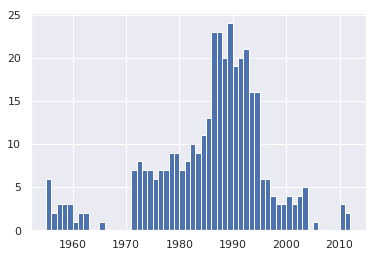

In [14]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2013))

At a glance, we can see that the most invalid values in a single year is fewer than 25, and as there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak. For our purposes, let’s say this is acceptable and go ahead and remove these rows.

In [15]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

We should validate if that worked! 

In [16]:
eval(In[6])

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Hurray! Our dataset has been cleaned up.

### Time to Plot the graphs

Let's begin with defining a function to plot the graph, set the title and add lables for the x-axis and y-axis

In [17]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
# function to plot the graphs with superimposed standard deviation    
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

Let's get on to plotting the **average profit by year** and **average revenue by year** using Matplotlib

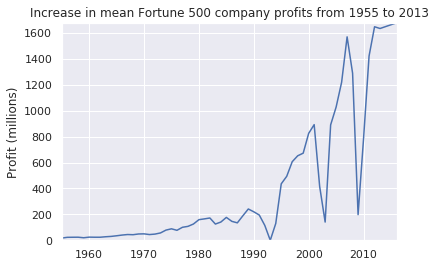

In [18]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit

fig, ax = plt.subplots()
plot(x, y, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2013', 'Profit (millions)')

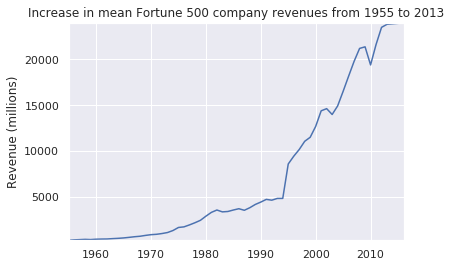

In [19]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2013', 'Revenue (millions)')

Woah! The charts for profits has got some huge ups and downs. It seems like they correspond to the [early 1990s recession](https://en.wikipedia.org/wiki/Early_1990s_recession), the [dot-com bubble](https://en.wikipedia.org/wiki/Dot-com_bubble) in the early 2000s and the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession) in 2008.

On other hand, the Revenues are constantly growing and are comparatively stable. Also it does help to understand how the average profits recovered so quickly after the staggering drops because of the recessions.

Let's also take a look at how the average profits and revenues compare to their standard deviations.

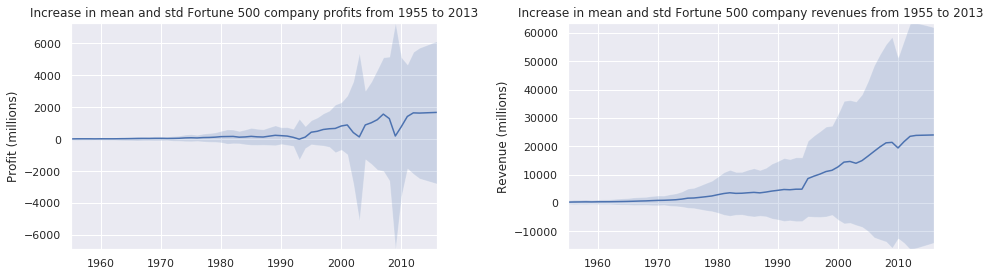

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2013'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

That's astonishing, the standard deviations are huge. Some companies are making billions while some others are losing as much, and the risk certainly has increased along with rising profits and revenues over the years. 
Although we could keep on playing around with our data set and plot plenty more charts to analyze, it is time to draw this article to a close.

## Conclusion

As part of this article we have seen various features of the Jupyter notebooks, from basics like installation, creating, editing and running code cells to more advanced features like plotting graphs. The power of Jupyter Notebooks to promote a productive working experience and provide an ease of use is evident from the above example, and I do hope that you feel confident to begin using Jupyter Notebooks in your own work and start exploring more advanced features.   